# Implementing MLPs with Keras
# Building an Image Classifier Using the Sequential API

## Collection and preparation of the dataset

### 1.1 Collection of the dataset

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### 1.2 Split of the dataset

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
print(f'X_train_full shape: {X_train_full.shape}')
print(f'y_train_full shape: {y_train_full.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_train shape: (55000, 28, 28)
y_train shape: (55000,)
X_valid shape: (5000, 28, 28)
y_valid shape: (5000,)


### 1.3 Data scaling

In [4]:
# Scale color saturation from to range from 0 to 1
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

### 1.4 Getting to know the data

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

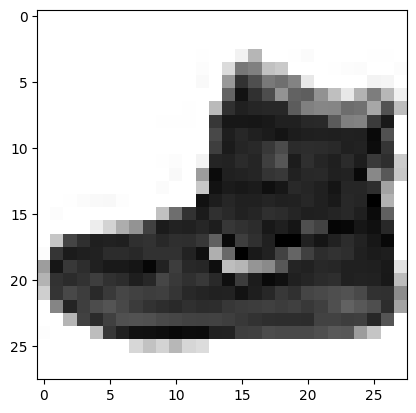

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]


'Ankle boot'

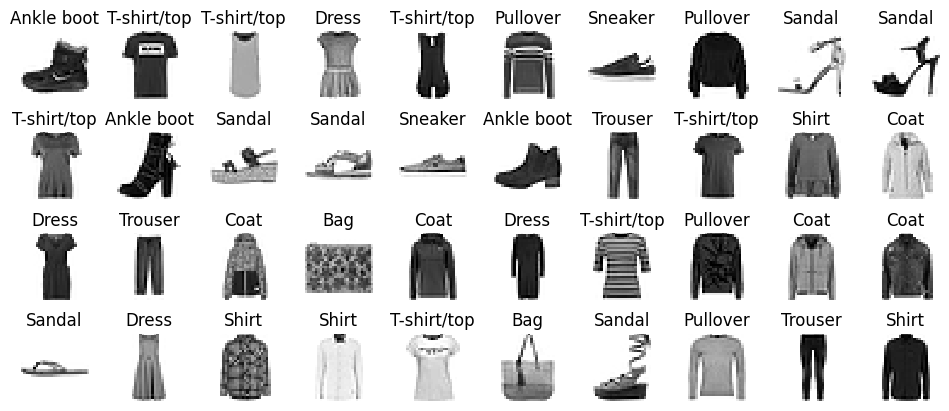

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Creating the model using the Sequential API

### 2.1 Building a neural network

In [10]:
tf.random.set_seed(42) # tf.keras.utils.set_random_seed()
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten()) # Transforming into one-dimensional arrays ([32, 28, 28] = [32, 784]) - X.reshape(-1, 784)
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Output layer

In [11]:
# Way with a list

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


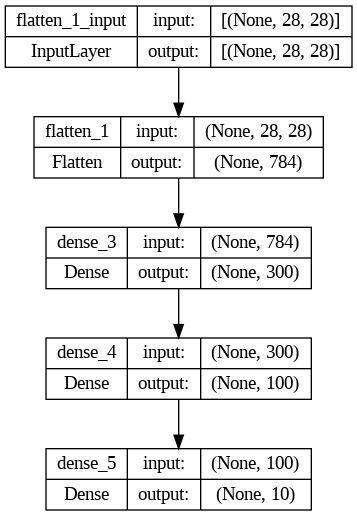

In [13]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


### 2.2 List of model variants

In [14]:
model.layers

In [15]:
model.get_layer('flatten_1')

### 2.2 Model parameters

In [16]:
hidden1 = model.layers[1] # <keras.src.layers.core.dense.Dense object at 0x7a0989bc72e0>
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape, '\n')
print(biases)
print(biases.shape)

[[-0.05053774  0.01538163  0.03347552 ... -0.01442673 -0.00050925
  -0.00881995]
 [-0.00788341 -0.04660614 -0.06922489 ... -0.00847655  0.06156424
  -0.0494341 ]
 [-0.05565228  0.03837267  0.06101875 ...  0.03801204 -0.00784822
   0.05522706]
 ...
 [ 0.05795538  0.05470452  0.07336064 ... -0.07259261  0.05288029
  -0.06757223]
 [-0.05958223 -0.02671532 -0.04671124 ...  0.00033368 -0.04689252
  -0.0714509 ]
 [-0.06061741  0.02730983 -0.05871859 ... -0.04439994  0.01921994
  -0.04095117]]
(784, 300) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## Compiling the model

In [17]:
model.compile(loss='sparse_categorical_crossentropy', # rare labels (They can be replaced to one-hot vectors)
              optimizer='sgd', metrics=['accuracy'])

# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [18]:
# shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
import numpy as np

# shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

## Training and evaluating the model

### 4.1 Model training

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7028 - accuracy: 0.7675 - val_loss: 0.5001 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4845 - accuracy: 0.8329 - val_loss: 0.4620 - val_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4391 - accuracy: 0.8475 - val_loss: 0.4186 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4146 - accuracy: 0.8555 - val_loss: 0.3924 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3941 - accuracy: 0.8625 - val_loss: 0.3889 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8668 - val_loss: 0.3945 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3652 - accuracy: 0.8705 - val_loss: 0.3748 - val_accuracy

### 4.2 Parameters

In [21]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

### 4.3 Learning curve

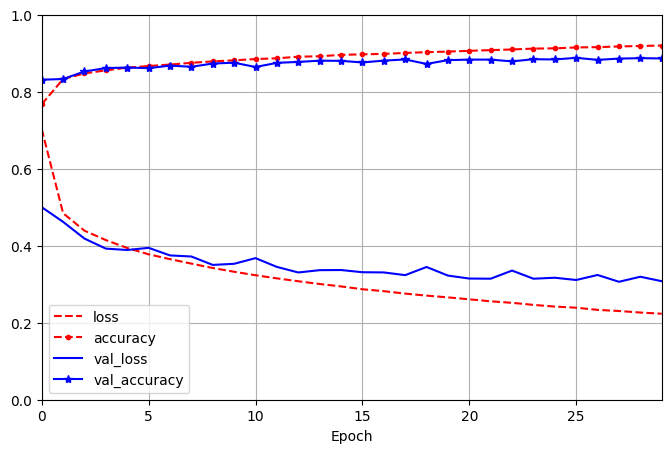

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

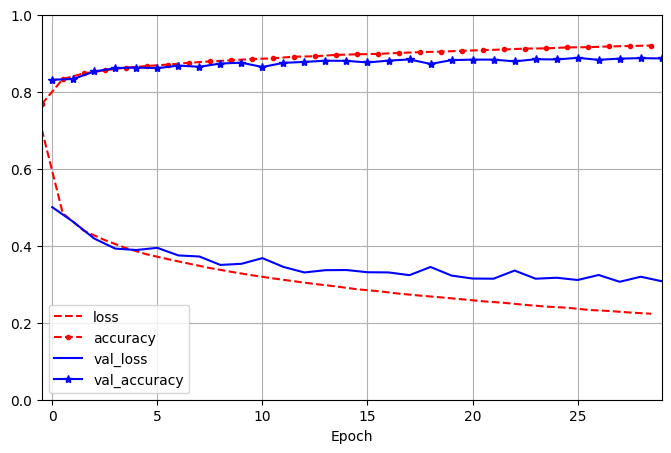

In [30]:
# shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

### 4.3 Model continuation of training

In [34]:
additional_epochs = 20
total_epochs = 30 + additional_epochs

history = model.fit(X_train, y_train, epochs=total_epochs,
                    validation_data=(X_valid, y_valid),
                    initial_epoch=30)

Epoch 31/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2083 - accuracy: 0.9250 - val_loss: 0.3325 - val_accuracy: 0.8796
Epoch 32/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2066 - accuracy: 0.9250 - val_loss: 0.3173 - val_accuracy: 0.8884
Epoch 33/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2018 - accuracy: 0.9271 - val_loss: 0.3132 - val_accuracy: 0.8872
Epoch 34/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2004 - accuracy: 0.9292 - val_loss: 0.3055 - val_accuracy: 0.8904
Epoch 35/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1967 - accuracy: 0.9299 - val_loss: 0.3054 - val_accuracy: 0.8900
Epoch 36/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1931 - accuracy: 0.9313 - val_loss: 0.3215 - val_accuracy: 0.8848
Epoch 37/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1909 - accuracy: 0.9307 - val_loss: 0.3182 - val_a

### 4.4 Evaluating the model

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8875


[0.3435029685497284, 0.887499988079071]

## Using the model to make predictions

### 5.1 Predictions

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
y_pred = y_proba.argmax(axis=-1) # Class with highest estimated probability
y_pred

array([9, 2, 1])

In [49]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [50]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 5.2 Correctly classified images

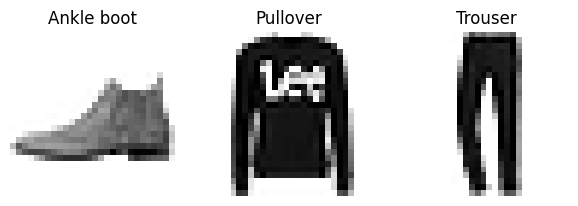

In [52]:
# this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()